In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [106]:
df = pd.read_csv('./data/real-estate.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [107]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [108]:
df = df.drop(labels='No', axis=1)
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [109]:
df = df.rename(columns={
    "X1 transaction date": "TransactionDate",
    "X2 house age": "HouseAge",
    "X3 distance to the nearest MRT station": "DistanceToMRTStation",
    "X4 number of convenience stores": "NumberOfConvenienceStores",
    "X5 latitude": "Latitude",
    "X6 longitude": "Longitude",
    "Y house price of unit area": "HousePrice"
})
df.head()

,TransactionDate,HouseAge,DistanceToMRTStation,NumberOfConvenienceStores,Latitude,Longitude,HousePrice
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


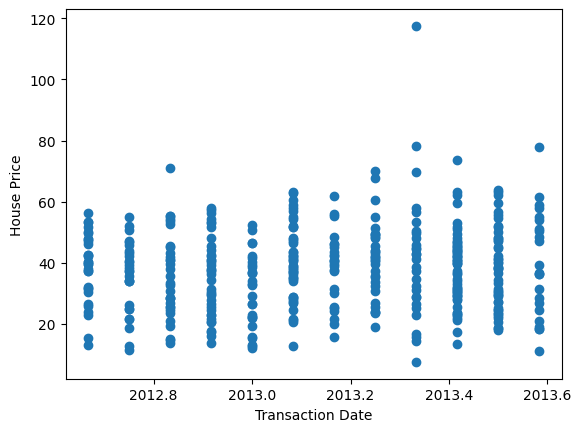

In [110]:
plt.scatter(df['TransactionDate'], df['HousePrice'])
plt.xlabel('Transaction Date')
plt.ylabel('House Price')
plt.show()

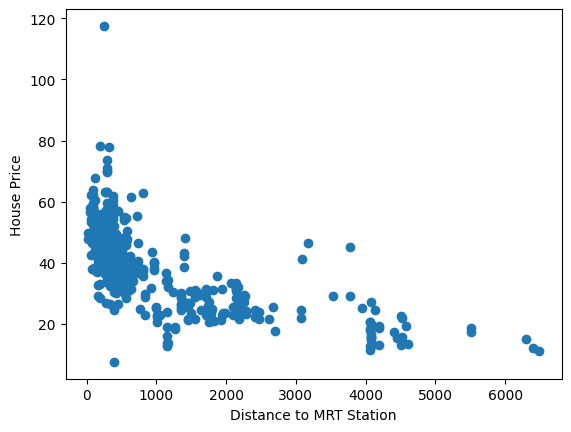

In [111]:
plt.scatter(df['DistanceToMRTStation'], df['HousePrice'])
plt.xlabel('Distance to MRT Station')
plt.ylabel('House Price')
plt.show()

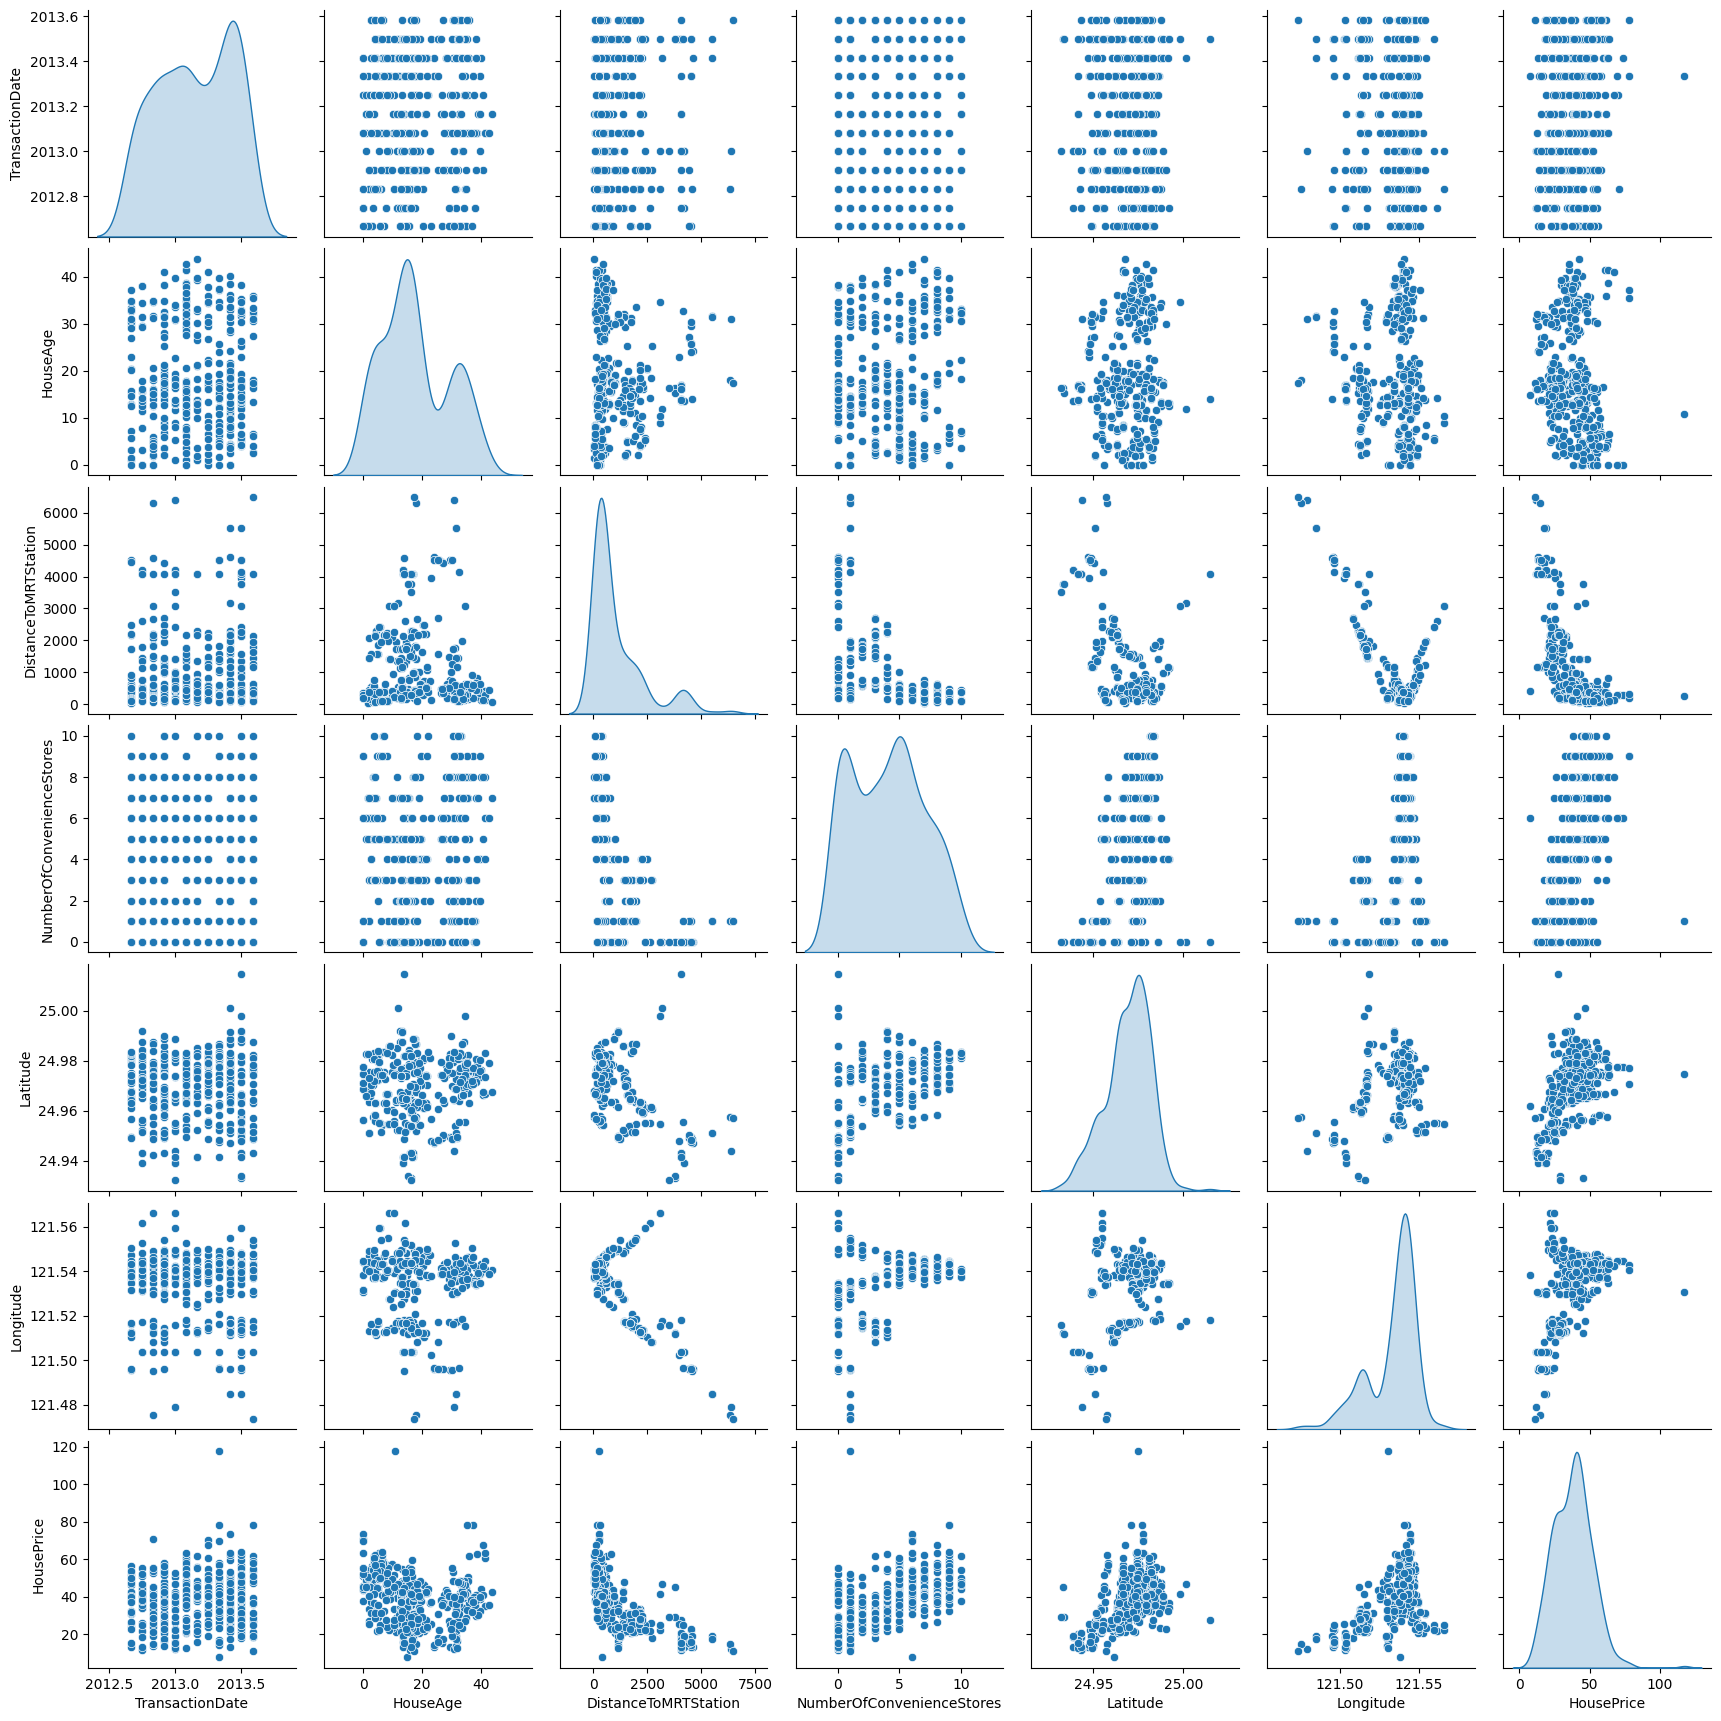

In [112]:
sns.pairplot(df, diag_kind='kde')

In [113]:
df.corr()

,TransactionDate,HouseAge,DistanceToMRTStation,NumberOfConvenienceStores,Latitude,Longitude,HousePrice
TransactionDate,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
HouseAge,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
DistanceToMRTStation,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
NumberOfConvenienceStores,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
Latitude,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
Longitude,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
HousePrice,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


<Axes: >

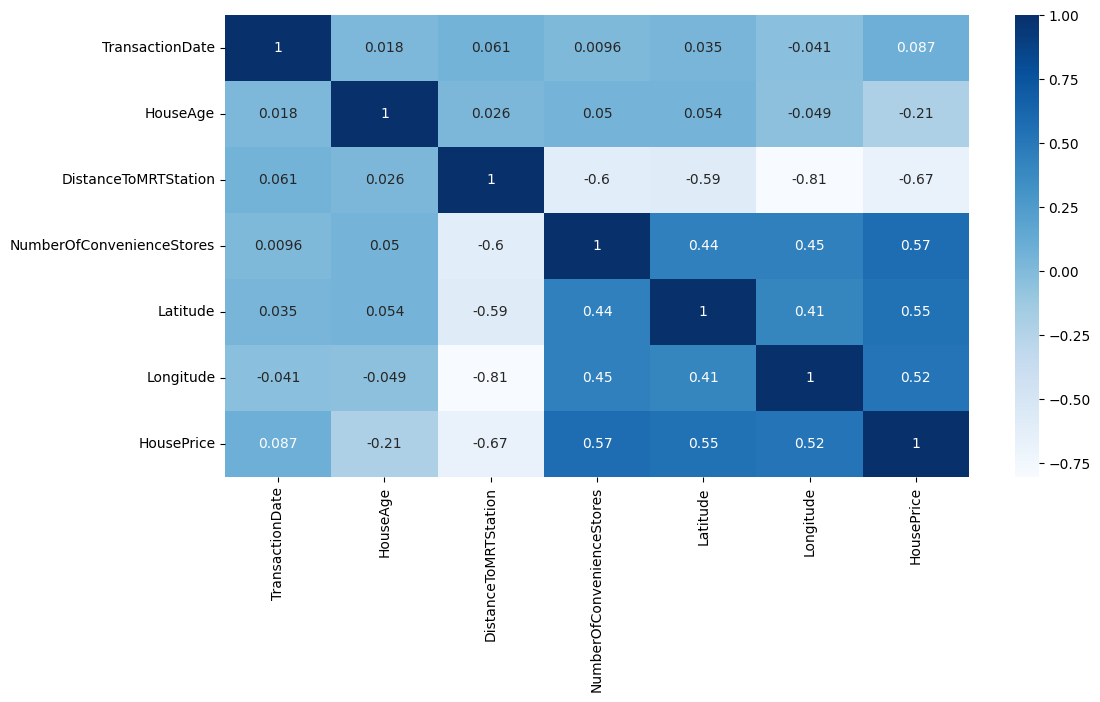

In [114]:
plt.subplots(figsize=(12, 6))
sns.heatmap(df.corr(),annot=True, cmap="Blues",)

In [115]:
X = df.drop(labels='HousePrice', axis=1)
y = df['HousePrice']

In [116]:
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)
X_poly.shape, X.shape

((414, 28), (414, 6))

In [117]:
X_train, X_test, y_train, y_test = train_test_split(
    X_poly, y, test_size=0.2, random_state=42
)

In [118]:
poly_model = LinearRegression()
poly_model.fit(X_train, y_train)
y_predict = poly_model.predict(X_test)

In [119]:
pd.DataFrame({'Y_Test': y_test,'Y_Pred':y_predict, 'Residuals':(y_test-y_predict) }).head(5)

,Y_Test,Y_Pred,Residuals
358,45.1,52.230289,-7.130289
350,42.3,36.887987,5.412013
373,52.2,54.164429,-1.964429
399,37.3,41.435729,-4.135729
369,22.8,19.526374,3.273626


In [120]:
Poly_MAE = mean_absolute_error(y_test,y_predict)
Poly_MSE = mean_squared_error(y_test,y_predict)
Poly_RMSE = np.sqrt(Poly_MSE)

pd.DataFrame([Poly_MAE, Poly_MSE ,Poly_RMSE],index=['MAE', 'MSE', 'RMSE'], columns=['metrics'])

,metrics
MAE,4.689924
MSE,40.631900
RMSE,6.374316


In [121]:
XS_train, XS_test, ys_train, ys_test = train_test_split(X, y, test_size=0.3, random_state=101)
simplemodel=LinearRegression()
simplemodel.fit(XS_train, ys_train)
ys_pred=simplemodel.predict(XS_test)

MAE_simple = mean_absolute_error(ys_test,ys_pred)
MSE_simple = mean_squared_error(ys_test,ys_pred)
RMSE_simple = np.sqrt(MSE_simple)

In [122]:
pd.DataFrame({'Poly Metrics': [Poly_MAE, Poly_MSE ,Poly_RMSE], 'Simple Metrics':[MAE_simple,
                                                                                 MSE_simple,RMSE_simple]}, index=['MAE', 'MSE', 'RMSE'])

,Poly Metrics,Simple Metrics
MAE,4.689924,5.392294
MSE,40.631900,46.211798
RMSE,6.374316,6.797926


In [123]:
# Train List of RMSE per degree
train_RMSE_list=[]
#Test List of RMSE per degree
test_RMSE_list=[]

for d in range(1,10):
    
    #Preprocessing
    #create poly data set for degree (d)
    polynomial_converter= PolynomialFeatures(degree=d, include_bias=False)
    poly_features= polynomial_converter.fit(X)
    poly_features= polynomial_converter.transform(X)
    
    #Split the dataset
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    
    #Train the Model
    polymodel=LinearRegression()
    polymodel.fit(X_train, y_train)
    
    #Predicting on both Train & Test Data
    y_train_pred=polymodel.predict(X_train)
    y_test_pred=polymodel.predict(X_test)
    
    #Evaluating the Model
    
    #RMSE of Train set
    train_RMSE=np.sqrt(mean_squared_error(y_train, y_train_pred))
    
    #RMSE of Test Set
    test_RMSE=np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    #Append the RMSE to the Train and Test List
    
    train_RMSE_list.append(train_RMSE)
    test_RMSE_list.append(test_RMSE)

In [124]:
pd.DataFrame({'Train RMSE List':train_RMSE_list, 'Test RMSE List': test_RMSE_list})

,Train RMSE List,Test RMSE List
0,9.543254,6.797926
1,8.168684,5.342145
2,7.570391,7.018653
3,7.057634,19.147811
4,6.769805,39.367808
5,6.668660,130.143206
6,6.957565,257.834945
7,6.847603,3760.843163
8,6.941205,23658.794658


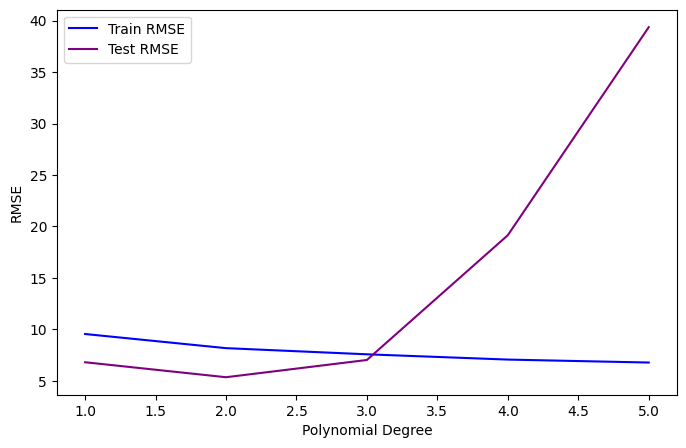

In [125]:
fig = plt.figure(figsize=(8,5))
plt.plot(range(1,6), train_RMSE_list[:5], label='Train RMSE', color="blue")
plt.plot(range(1,6), test_RMSE_list[:5], label='Test RMSE', color="purple")

plt.xlabel('Polynomial Degree')
plt.ylabel('RMSE')
plt.legend()
plt.show()